<h1><center>Reducing Commercial Aviation Facilities</center></h1>

### Team Members:
   - Aysha Machingara (amaching)
   - Sonali Agarwal (sonalia)

### Problem Statement
 - To avert aircraft accidents caused by ‘Pilot Error’ by alerting the pilots when they enter a troubling cognitive state preventing them from discharging their duties effectively
 - To build a model to be able to detect the troubling state of the pilot by training the model on their physiological data acquired from subjecting them to test simulations


### Motivation
The top reasons for aviation fatalities, we observe that over the years
from the 1960s up to as recent as 2015 ~60% of the fatalities are due to pilot error -
(𝐶𝑎𝑢𝑠𝑒𝑠 𝑜𝑓 𝐹𝑎𝑡𝑎𝑙 𝐴𝑐𝑐𝑖𝑑𝑒𝑛𝑡𝑠 𝑏𝑦 𝐷𝑒𝑐𝑎𝑑𝑒[1]) making it a huge improvement focus area to begin with. The
dataset chosen focuses on analyzing the different physiological features of pilots during piloting and
predicting the different cognitive state a pilot is in, to create an alert mechanism in scenariosthey transition
into a non-attentive state. It became very apparent to us through our external research and validation that
exploring this problem through the lens of data analytics would bring immense value in the aviation industry
by keeping flight travelers safer along with assisting pilots in taking appropriate amount of work load so as
to discharge their duties effectively.

[1] Causes of Fatal Accidents by Decade in the Aviation Industry ∶ http://www.planecrashinfo.com/cause.htm

### Data Description

The dataset is divided into train and test and consists of the following information
- __Train Dataset__: The dataset provides information on eighteen pilots who were subjected to various distracting events to induce one of the three cognitives states - Channelized Attention(CA), Diverted Attention(DA) and Startle/Surprise(SS)
- __Test Dataset__: The test dataset, on the other hand, captures the physiological response when the pilots are subjected to LOFT (Line Oriented Flight Training)
        

### Assumptions

The underlying assumptions are:
 -  The data generation process is through an experimental set up where the values associated with the experiment outcomes is assumed to be true
 - Given the data generation process is experimental, majority of it is structured and clean with minimal requirement of imputation and cleaning. External validation will be done to perform sanity checks
 - Given the output is to identify the anomalities in the physiological readings of crew, it is assumed that such a model would be beneficial and deployed in live settings to build real-life feedback mechanism systems and framworks ( Through external validation we have identified it is a research work acrss multiple research groups and hence, paves a critical path towards ensuring during flight safety)
 - Given the huge size of the dataset (~over 10GB) reasonable % of data is being utilized inorder to study the distribution and model construction

### External Validation

 - Through external valiation we have been able to validate the range of our attributes. This step has been taken inorder to ensure data sanity checks
 
 - EEG Value Range  - The range of EEG in a typical situation..........
 - ECG Range - The range of ECG is expected in 100s of Microvolts and the values when described are in the same range
 
 [1] [The voltage of R-waves in the normal electrocardiogram] https://www.ncbi.nlm.nih.gov/pubmed/3768066

### Machine Learning Pipeline / Approach

<img src="ProjectPipeline.png">

#### Exploring Model Space

 - Keeping in mind the objective of the problem, the machine learning model is a classification under supervised category.
 - Therefore, the model space exploration will be screening base classification model such as Multinomial Logistic Regression. Tree based models will then be explored for building more complex models

#### Performance Evaluation - Classification Models

The performance will be gauged using the classic methods of measuring classification model performance – Prediction accuracy of the test labels.

- It makes sense to use this as a metric as it will help us analyze the number of times our model has been able to accurately predict the cognitive state.
- Majority of the cases would be where the pilot is attentive, so in order to handle class imbalance issues and ensure we are flagging all the labels appropriately and not just those that are in majority, it would be beneficial to study confusion matrix
and derive precision , recall, Specificity, F1 Score along with accuracy.
- We would also study the AUC and ROC curves to assess the model performance with different parameters. In addition, we could use Logarithmic loss given the multi-class label nature of the problem


## Coding Section

#### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import gc 
import warnings
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
warnings.filterwarnings('ignore')

#### Data loading

In [2]:
import pandas as pd
train_df = pd.read_csv("train.csv")

### Pipeline Section - I - Data Cleaning and Imputation

#### DATA DISCREPANCY

The dataset has been generated in a contolled experimenatal setup and we are assuming that all the precautions have been taken to exclude any noise in the data.(ex. flickering of light or any additiona; movement that might influence the brain activity). 

The data is comparitively clean and hence require only null/missing check



#### NULL VALUE CHECK

After step one of cleaning process, there are no null values in any of the columns . therefore we donot need to remove null values.

In [3]:
train_df.info(verbose=True) # checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 28 columns):
crew          int64
experiment    object
time          float64
seat          int64
eeg_fp1       float64
eeg_f7        float64
eeg_f8        float64
eeg_t4        float64
eeg_t6        float64
eeg_t5        float64
eeg_t3        float64
eeg_fp2       float64
eeg_o1        float64
eeg_p3        float64
eeg_pz        float64
eeg_f3        float64
eeg_fz        float64
eeg_f4        float64
eeg_c4        float64
eeg_p4        float64
eeg_poz       float64
eeg_c3        float64
eeg_cz        float64
eeg_o2        float64
ecg           float64
r             float64
gsr           float64
event         object
dtypes: float64(24), int64(2), object(2)
memory usage: 1.0+ GB


In [4]:
train_df.isna().sum()

crew          0
experiment    0
time          0
seat          0
eeg_fp1       0
eeg_f7        0
eeg_f8        0
eeg_t4        0
eeg_t6        0
eeg_t5        0
eeg_t3        0
eeg_fp2       0
eeg_o1        0
eeg_p3        0
eeg_pz        0
eeg_f3        0
eeg_fz        0
eeg_f4        0
eeg_c4        0
eeg_p4        0
eeg_poz       0
eeg_c3        0
eeg_cz        0
eeg_o2        0
ecg           0
r             0
gsr           0
event         0
dtype: int64

### Pipeline Section - II - Data Scaling and Standardization

Data standardization is not particulary required in this scenario. However, to make the process holistic, we have done Min Max scaler in order to study the distribution and specifically under the section of feature importance analysis

The reasoning though behind not requiring an extensive scaling methodology is for the following reasons:
- Over 90% of the variables are EEG based physiological readings which are all in the same scale
- Given classification problem implementation via tree models, standardization is not needed as they only map the information into a different space without changing the relationship between features and target variable

### Pipeline Section - III - Exploratory Data Analysis

### Target Output Study

#### TARGET VARIABLE DISTRIBUTION IN DATA

__Insight__: By studying the distribution of the target variable we can say that majority of the status is A(baseline) and C(Channelized Attention). This indicates need to handle imbalance in modelling process 

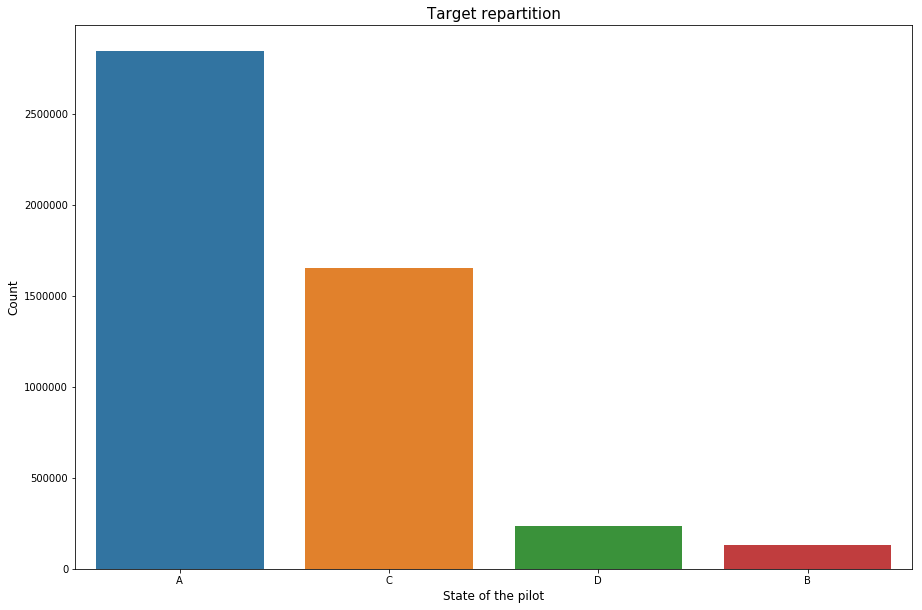

In [5]:
plt.figure(figsize=(15,10))
##Referring to the target variable
sns.countplot(train_df['event'])
##Defining the xlabels
plt.xlabel("State of the pilot", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Target repartition", fontsize=15)
plt.show()

#### SEAT DISTRIBUTION IN EXPERIMENT STUDY

__Insight__: There is no experimental Bias in terms of Left and Right seat arrangement and hence no manipulation is required for this feature from data imbalance perspective

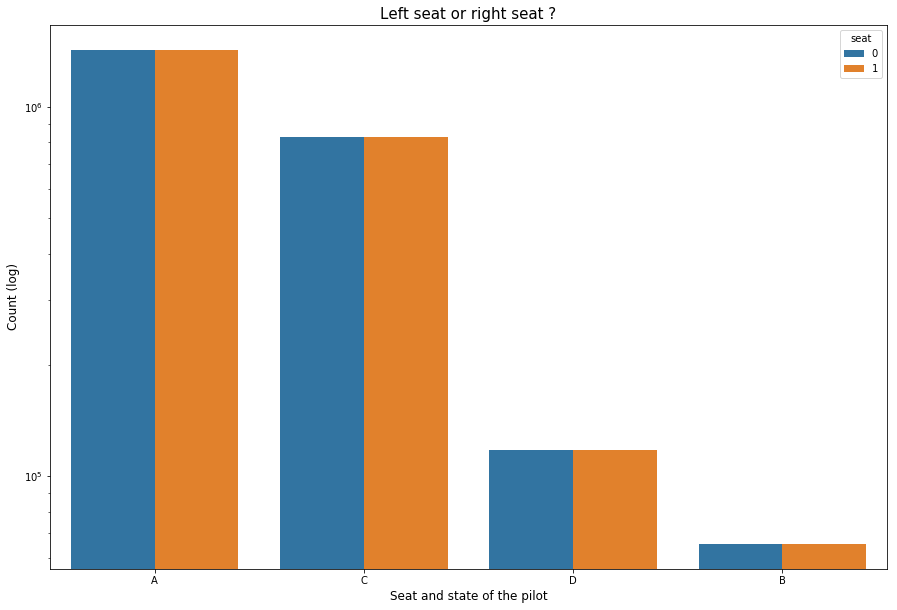

In [6]:
plt.figure(figsize=(15,10))
#Using the respective variables 
sns.countplot('event', hue='seat', data=train_df)
##Defining the labels
plt.xlabel("Seat and state of the pilot", fontsize=12)
plt.ylabel("Count (log)", fontsize=12)
#Setting the scale for interpretability
plt.yscale('log')
plt.title("Left seat or right seat ?", fontsize=15)
plt.show()

### Feature Relationship Exploration

#### TIME OF THE EXPERIMENT

__Insight__: Subtle variations and trend can be observed in the amount of time it takes from starting point of experiment into moving into the respective state. This feature, however, will be useful in testing only if we have take off and landing time

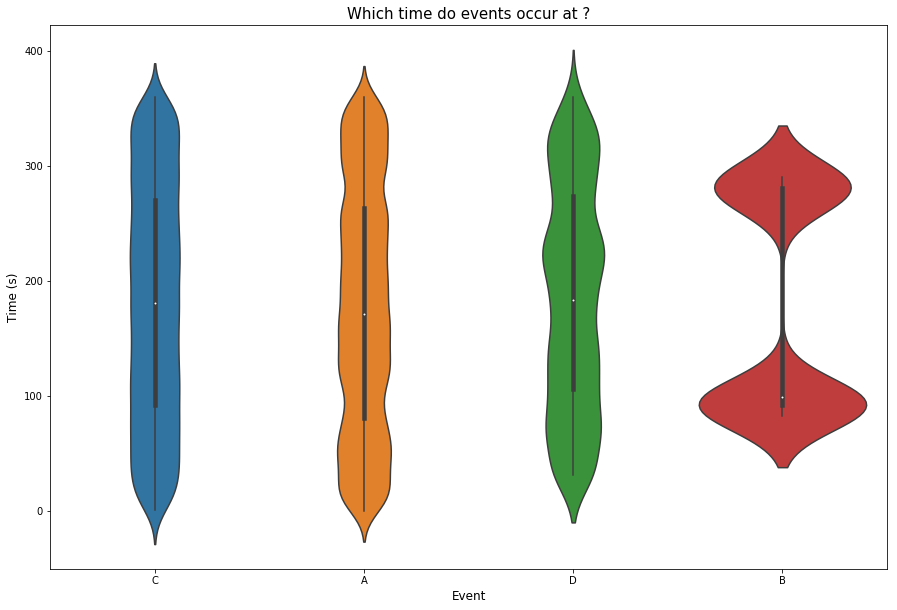

In [7]:
plt.figure(figsize=(15,10))
#Using the respective values
sns.violinplot(x='event', y='time', data=train_df.sample(50000))
# Setting the labels and titles
plt.ylabel("Time (s)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Which time do events occur at ?", fontsize=15)
plt.show()

#### EEG FEATURE DISTRIBUTION

__Insight__:  We clearly observe a trend in the B(Startle/Surprise) and D(Diverted Attention) behavior as compared to that
of A(Baseline) and C(Channelized Attention) states making the EEG features relevant.

- This also points us in the direction of manipulating these features as there currently exists over 13 EEG features and these many will only add noise and unwanted correlations into the modeling process. Hence, through this representation we have concluded to include only a subset of information along with manipulating them by studying the biology behind eeg interpretation

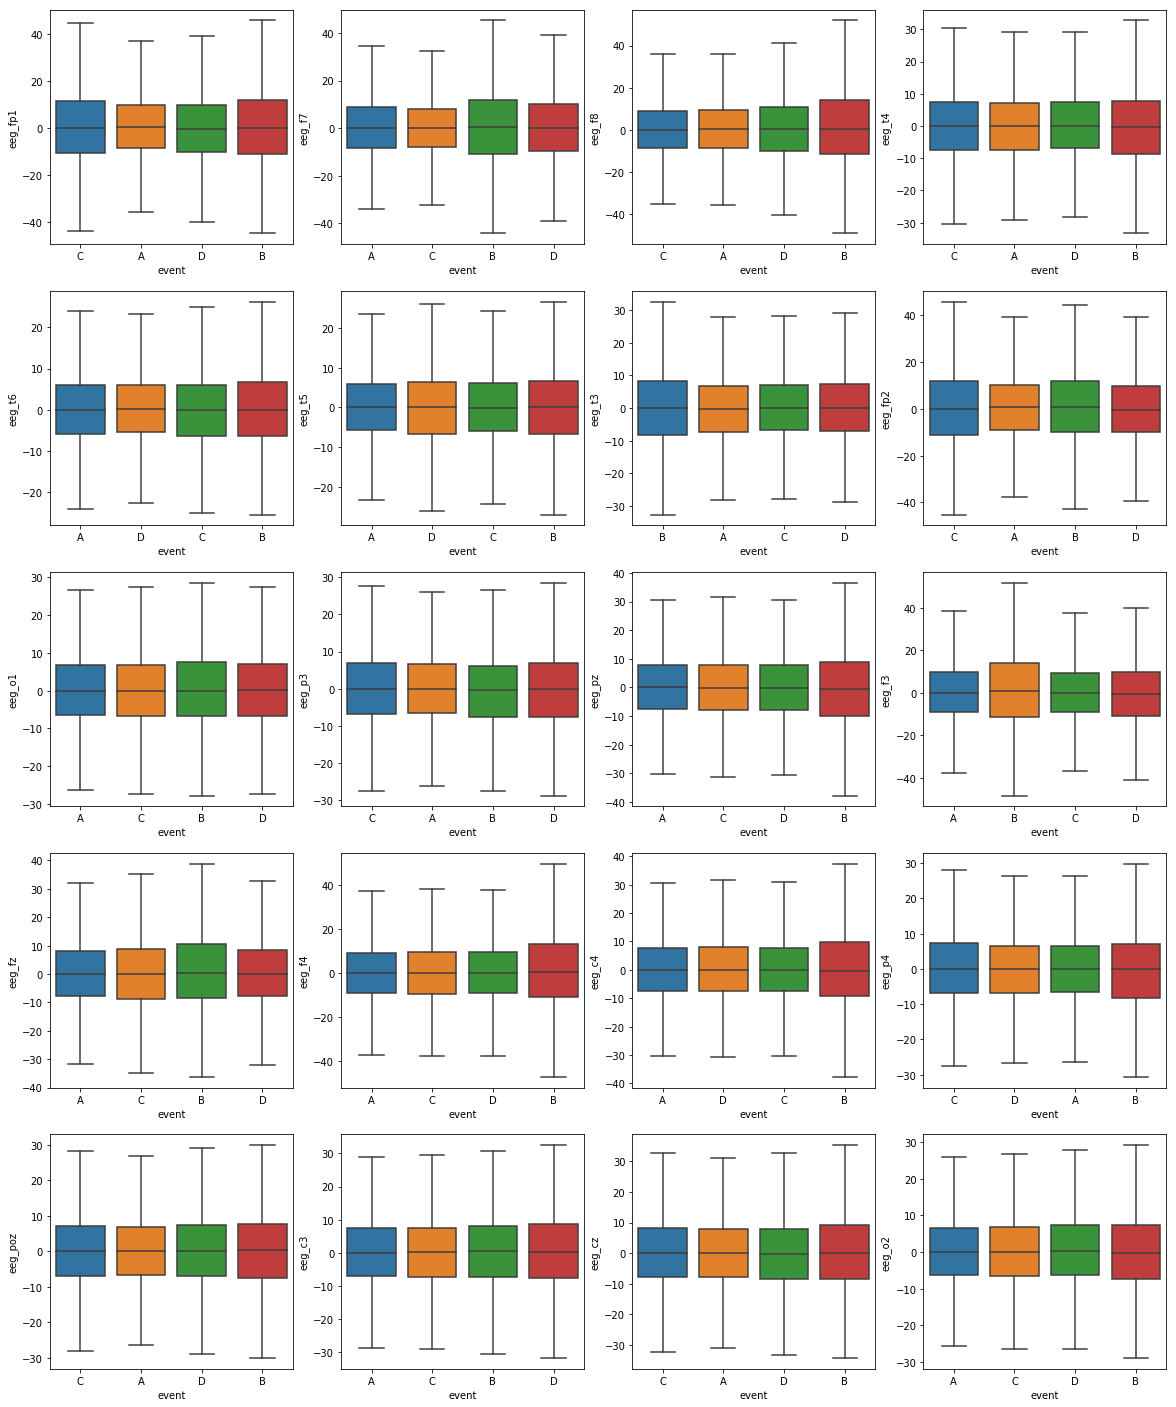

In [8]:
#Selecting all the EEG Features
eeg_features = ["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2"]

#Setting the size of the figure
plt.figure(figsize=(20,25))
i = 0
#creating a box plot for every EEG Feature
for egg_feat in eeg_features:
    i += 1
    plt.subplot(5, 4, i)
    sns.boxplot(x='event', y=egg_feat, data=train_df.sample(50000), showfliers=False)
#Displaying the plot
plt.show()

#### ELECTROCARDIOGRAM DISTRIBUTION

__Insight__: We observe that ECG readings also form a good feature in terms of differentiating state D and B from A/C. Additionally, unlike the EEG readings
ECG forms as a more discriminatory feature in separately identifying all the four different states uniquely

ECG can be observed as expected to form a good differentiating feature for B(Surprise)


<Figure size 1080x720 with 0 Axes>

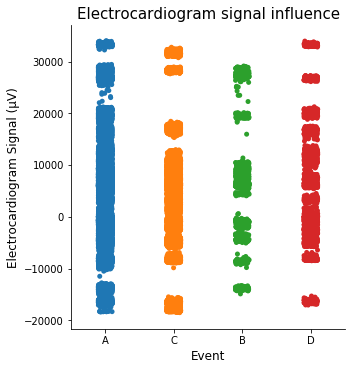

In [9]:
#Setting the figure size
plt.figure(figsize=(15,10))
#Setting up the catplot
sns.catplot(x='event', y='ecg', data=train_df.sample(60000))
#Setting the labels
plt.ylabel("Electrocardiogram Signal (µV)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Electrocardiogram signal influence", fontsize=15)
plt.show()

#### RESPIRATION FEATURE DISTRIBUTION

__Insight__: Respiration as a feature is able to identify the difference between state A and C, which will assist in contributing to more variance study between these two states as majority of our target outcomes is A or C state

Respiration seems spread out in case of baseline state of mind. Where as clear patterns, intermittent range of values can be observed for the other states, with very few outliers who can be in a calm/composed state when subjected to surprise/diversion based experiments 

<Figure size 1080x720 with 0 Axes>

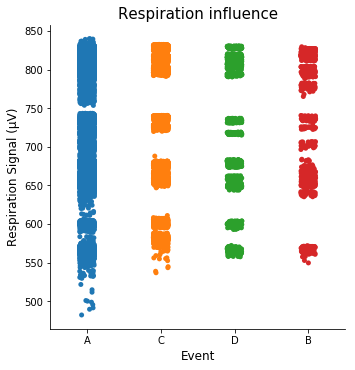

In [10]:
#Setting the figure size
plt.figure(figsize=(15,10))
#Setting up the catplot
sns.catplot(x='event', y='r', data=train_df.sample(40000))
#Setting the labels
plt.ylabel("Respiration Signal (µV)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Respiration influence", fontsize=15)
plt.show()

#### GALVANIC SKIN RESPONE FEATURE DISTRIBUTION

__Insight__: GSR variable adds value to identify the pattern difference between state B and D

Galvanice Skin Response is used to identify emotional stress in individual, and  through the representation it is evident that crew members subjected to diverted/suprised cognitive states have variation in the activity measure as expected

<Figure size 1080x720 with 0 Axes>

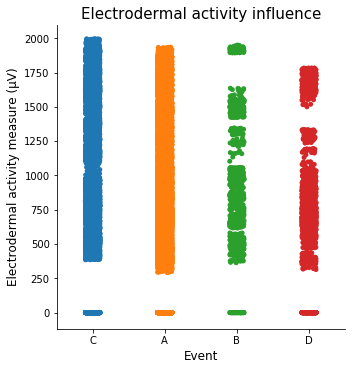

In [11]:
plt.figure(figsize=(15,10))
sns.catplot(x='event', y='gsr', data=train_df.sample(50000))
plt.ylabel("Electrodermal activity measure (µV)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Electrodermal activity influence", fontsize=15)
plt.show()

### FEATURE IMPORTANCE ANALYSIS

#### DATA SCALER 

In [12]:
#Scaling the data using min max scaler before studying importance
scaler = MinMaxScaler()

##Taking all the numerical variables f
trainN = train_df.loc[:, train_df.dtypes == np.float64]

##Defining the seat,crew, experiment variable
trainN['seat'] = train_df.seat
trainN['crew'] = train_df.crew
trainN[:] = scaler.fit_transform(trainN[:])
trainN['experiment'] = train_df['experiment'].map({'CA': -1, 'DA': 0,'SS':1})

In [13]:
#Checking the head of the newly created table
trainN.head()

,time,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,...,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,seat,crew,experiment
0,0.000024,0.406790,0.442990,0.431285,0.462933,0.583200,0.532208,0.466463,0.396589,0.611914,...,0.468430,0.579501,0.528516,0.328979,0.266527,0.937234,0.194429,1.0,0.0,-1
1,0.000035,0.407647,0.443446,0.431339,0.465714,0.582847,0.530859,0.465496,0.396652,0.611371,...,0.468612,0.579852,0.532549,0.329875,0.266527,0.937234,0.194429,1.0,0.0,-1
2,0.000046,0.411577,0.443994,0.437849,0.474482,0.582929,0.531555,0.467078,0.398478,0.611681,...,0.469919,0.580340,0.532706,0.331117,0.266527,0.937234,0.194429,1.0,0.0,-1
3,0.000057,0.411811,0.442668,0.434441,0.470692,0.584998,0.531289,0.464828,0.398430,0.612212,...,0.469720,0.578917,0.533475,0.330220,0.266527,0.937234,0.194429,1.0,0.0,-1
4,0.000068,0.410560,0.442760,0.433829,0.468640,0.584669,0.530168,0.465339,0.397945,0.612437,...,0.469731,0.579360,0.532829,0.331273,0.266527,0.937234,0.194429,1.0,0.0,-1


In [14]:
## Subsetting the data for different events
trainA = trainN[train_df.event=='A']
trainB = trainN[train_df.event=='B']
trainC = trainN[train_df.event=='C']
trainD = trainN[train_df.event=='D']

### CORRELATION MATRIX 

__Insight__:  It can be noticed with the correlation matrix clearly that for every different classes different subset of features are correlated. Also, that there are many features which have very feeble correlation across all class rendering them to be unfit for modeling purpose

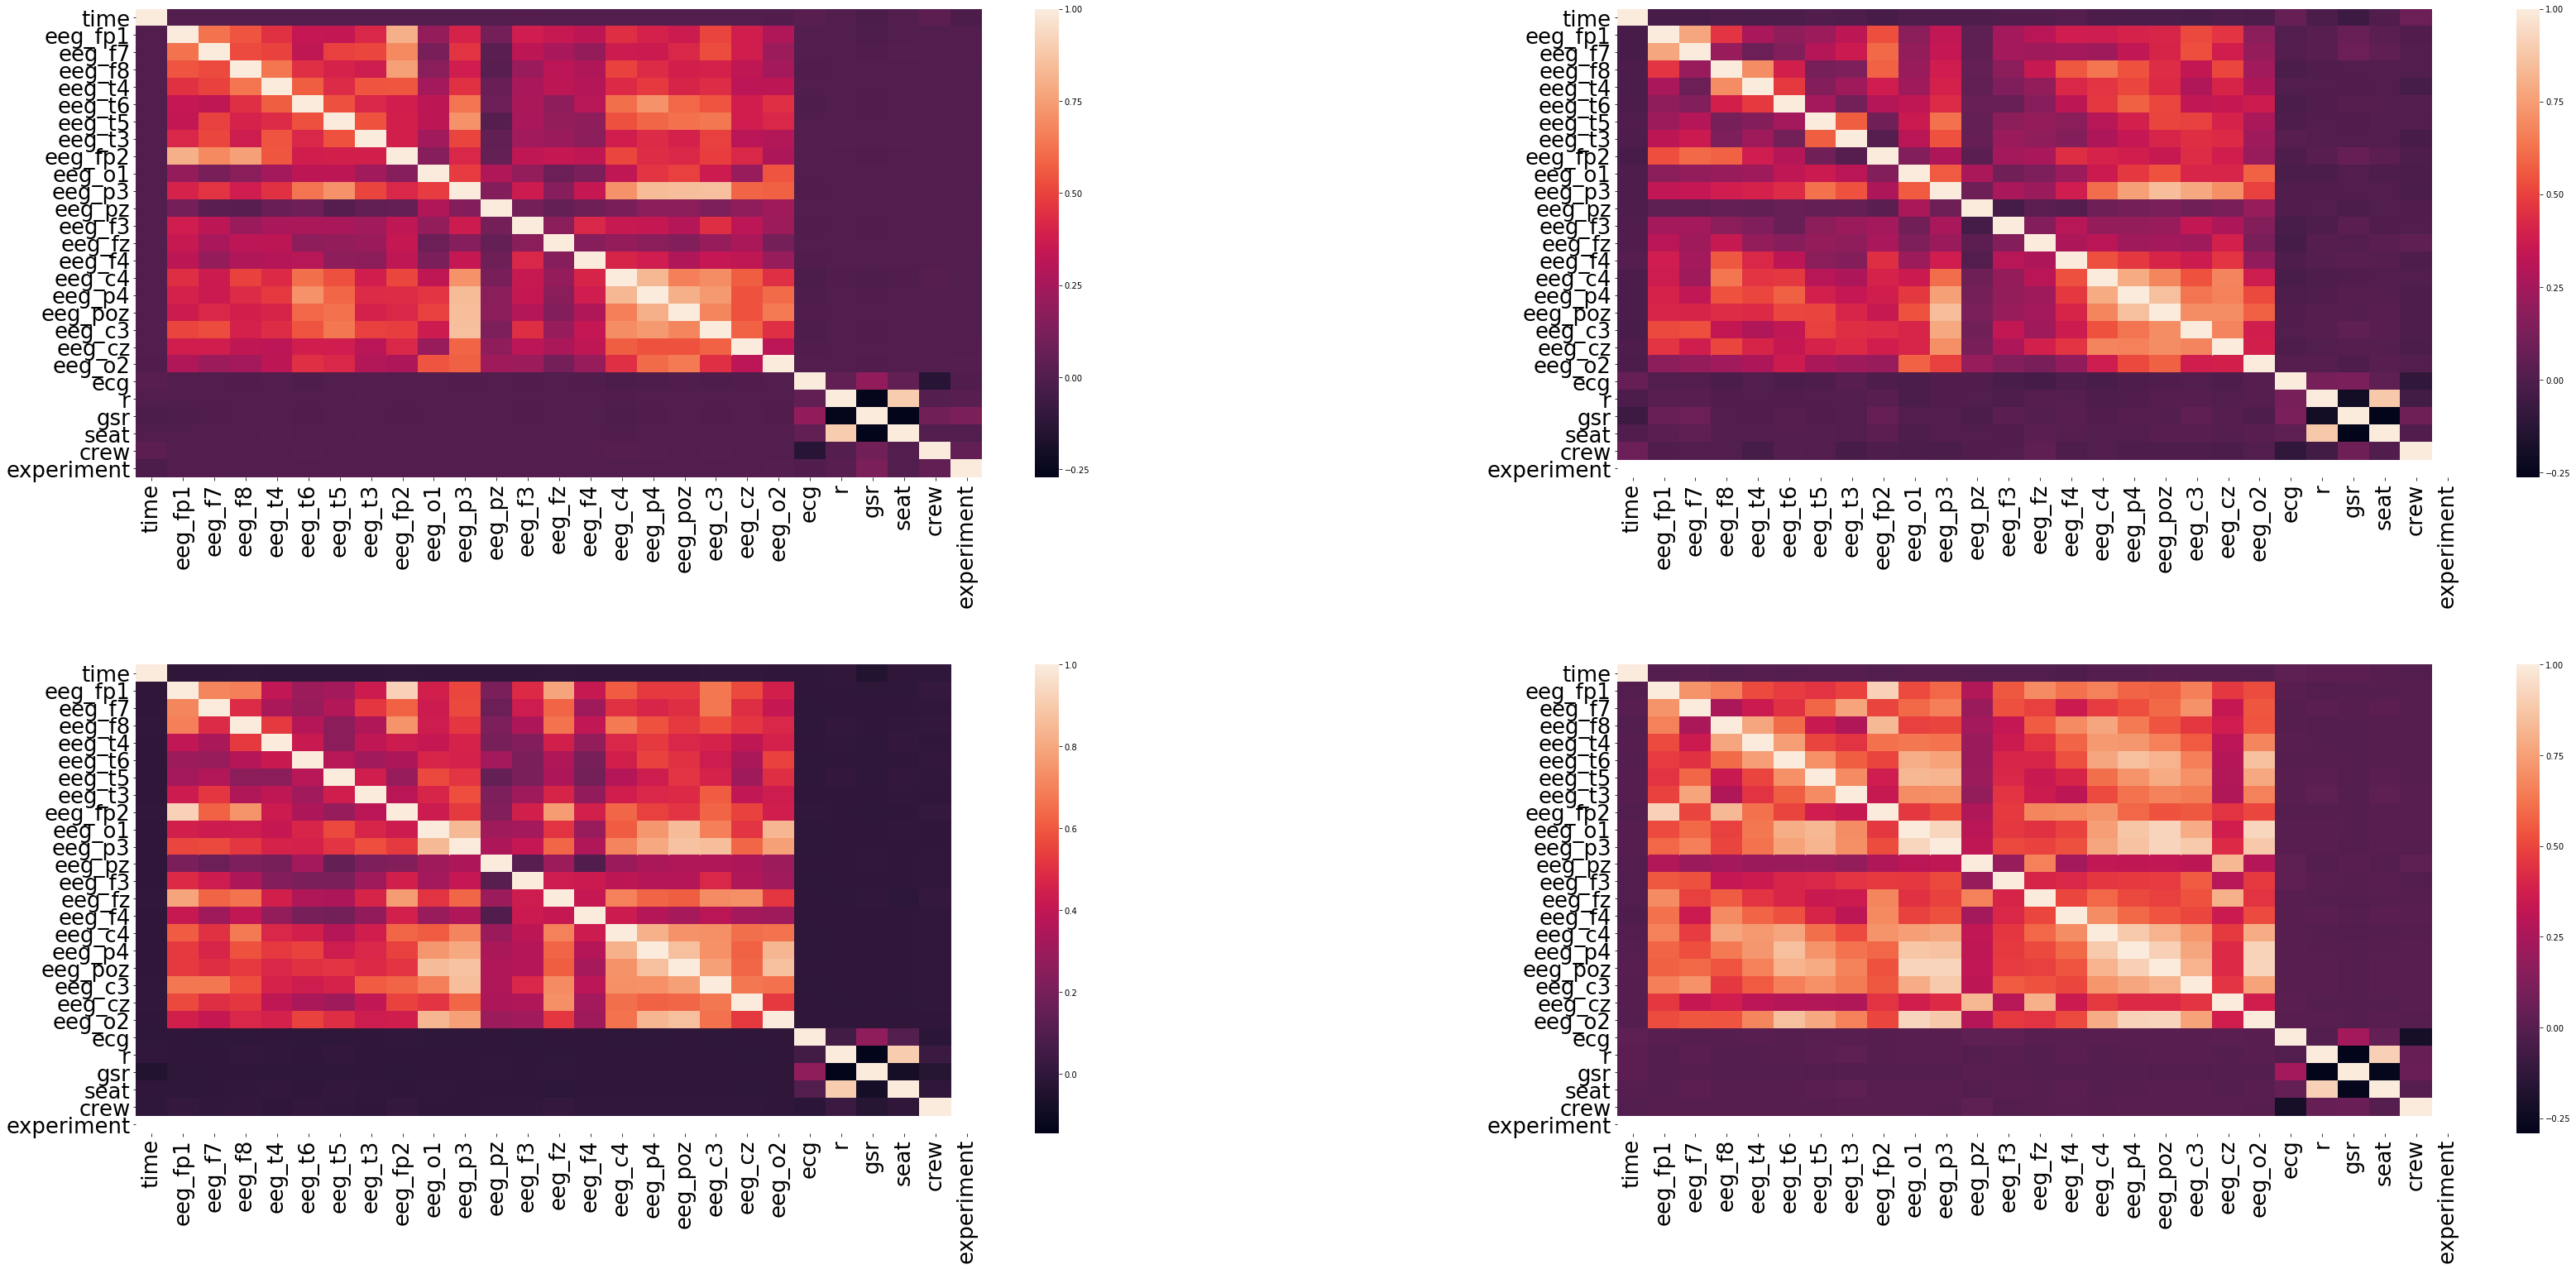

In [15]:
fig = plt.figure(figsize=(55,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


#For Event type A
plt.subplot(2, 2, 1)
corr = trainA.corr()
#Defining the heatmap and the parameter names
a = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#Defining the configuration of the label settings
plt.tick_params(axis='y', which='major', labelsize=26)
plt.tick_params(axis='x', labelrotation = 90,which='major', labelsize=26)

#For Event type B
plt.subplot(2, 2, 2)
corr = trainB.corr()
b = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#Defining the configuration of the label settings
plt.tick_params(axis='y', which='major', labelsize=26)
plt.tick_params(axis='x', labelrotation = 90,which='major', labelsize=26)

#For Event type C
plt.subplot(2, 2, 3)
corr = trainC.corr()
c = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#Defining the configuration of the label settings
plt.tick_params(axis='y', which='major', labelsize=26)
plt.tick_params(axis='x', labelrotation = 90,which='major', labelsize=26)

#For Event type D
plt.subplot(2, 2, 4)
corr = trainD.corr()
d = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#Defining the configuration of the label settings
plt.tick_params(axis='y', which='major', labelsize=26)
plt.tick_params(axis='x', labelrotation = 90,which='major', labelsize=26)

#### FEATURE EXPLAINED RATIO

__Insight__: Given, we have explored that only certain features are essential we wanted to identify the same using Principal Component Analysis. Through PCA analysis it was identified that 5 components were sufficiently able to identify over 90% of the variation in the target outcome

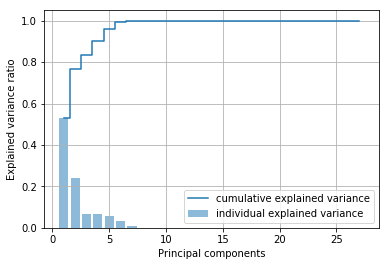

In [16]:
#Computing the covariance matrix using the desired values and then getting the eigen values and vector
cov_mat = np.cov(trainN.values.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

#Plotting the variance across for all variables 
plt.bar(range(1,len(trainN.columns)+1), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,len(trainN.columns)+1), cum_var_exp, where='mid',label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.grid()
plt.show()

### PCA Feature Identification

__Approach__: To identify the top 5 features we then ran PCA only on top 5 components ensuring that experiment was not one of the variable as we would not have that during the testing time

__Insight__ : It can be observed that 5 features uniquely identify 90% of the variations in the dataset

In [17]:
#Defining the number of components
pca = PCA(n_components=5)

#Ensuring we are not taking experiment
pca.fit_transform(trainN.iloc[:,:-1])

array([[-0.56594218, -0.59446418, -0.02989495, -0.30184079, -0.1001973 ],
       [-0.56594277, -0.59445482, -0.02990041, -0.30183973, -0.10019689],
       [-0.56594616, -0.59444919, -0.02991139, -0.30183254, -0.10019329],
       ...,
       [-0.48402399,  0.16610715,  0.67139227, -0.14977302, -0.0757184 ],
       [ 0.52581439,  0.18080329,  0.67157386, -0.33878789, -0.02516787],
       [-0.48403108,  0.16612801,  0.67140486, -0.14978261, -0.07571573]])

### VARIANCE EXPLANATION

In [18]:
## Explained ratio for indivividual components
print(pca.explained_variance_ratio_[0])
print(pca.explained_variance_ratio_[1])
print(pca.explained_variance_ratio_[2])
print(pca.explained_variance_ratio_[3])
print(pca.explained_variance_ratio_[4])

print()
print("The total variance being explained by 5 components is: "+str(sum([pca.explained_variance_ratio_[i] for i in range(0,4)])*100)+"%")

0.5082167415252414
0.14406119473439088
0.1387776188848128
0.1199602140324012
0.07064049712661347

The total variance being explained by 5 components is: 91.10157691768462%


### FINDING THE MOST CORRELATED FEATURE IN EACH PCA - COMPONENT

The below dataframe is a table with the information on the feature importance of every feature against each PCA component

In [19]:
info_df=pd.DataFrame(abs(pca.components_),columns=trainN.iloc[:,:-1].columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5'])

In [20]:
#Viewing the head of the dataframe
info_df.head()

,time,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,...,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,seat,crew
PC-1,0.001258,0.000043,0.000155,0.000076,0.000099,0.000009,0.000077,0.000127,0.000077,0.000037,...,0.000017,0.000025,0.000028,0.000029,0.000065,0.026334,0.388439,0.119572,0.913303,0.000526
PC-2,0.845676,0.000065,0.000003,0.000040,0.000035,0.000159,0.000104,0.000037,0.000024,0.000038,...,0.000105,0.000030,0.000142,0.000155,0.000036,0.086461,0.008338,0.033404,0.006288,0.525482
PC-3,0.529431,0.000174,0.000004,0.000128,0.000002,0.000255,0.000085,0.000057,0.000189,0.000017,...,0.000163,0.000046,0.000192,0.000206,0.000037,0.163285,0.015384,0.069223,0.008434,0.829422
PC-4,0.044494,0.000139,0.000100,0.000030,0.000009,0.000151,0.000041,0.000102,0.000071,0.000018,...,0.000165,0.000041,0.000192,0.000043,0.000021,0.590922,0.008793,0.797377,0.083599,0.077172
PC-5,0.050526,0.000489,0.000133,0.000092,0.000057,0.000063,0.000021,0.000011,0.000313,0.000020,...,0.000053,0.000032,0.000068,0.000074,0.000084,0.784844,0.015952,0.585639,0.092350,0.172370


The most important features can be found by identifying the absolute maximum feature importance against each component as given below 

__Insight__: It seems that EEG as a feature is not contributing towards any variation explanation and therefore as our next step inorder to make relevant usage of EEG feature, we move on to the feature engineering aspect that will provide us 
relevant information to capture the possible variations of the remaining 10%

In [21]:
#Important features
info_df.idxmax(axis=1)

PC-1    seat
PC-2    time
PC-3    crew
PC-4     gsr
PC-5     ecg
dtype: object

### OVERALL CONCLUSION
- Around 5 features are sufficient to identify over 90% variation in the data
- EEG feature is not useful in its raw form
- Given the underlying patterns and trends this problem can be solved using classification, specifically tree models to generate relevant rulesets

### Pipeline Section - IV - Feature Engineering

This data is prepared in a fairly typical arrangement of 20 electrodes across the scalp. The letter in each lead signifies the part of the brain that that lead is nearest to (Temporal, Frontal, Parietal etc), with odd numbers on the left, evens on the right. Usually in the clinic, we don't look at the electrical potentials at each electrode, but at the potential difference between pairs of electrodes. This gives us an idea of the electrical field in the brain region between these two points as a way to infer what the brain is doing in that region. Clearly you can choose any two electrodes and produce 20! different potential differences, but not all of those are going to be useful. 
We talk about the layout of choosing the pairs of electrodes to compare potential differences as Montages. There's lots of different montage systems, but commonly there's the 10-20 system. This data has an additional 'poz' electrode to the diagram, but that doesn't cause us a problem. !

For this experiment, we chose the middle montage because it's one that's used clinically. 
To montage the data, you just have to subtract the value of one electrode from another. It doesn't matter which way you do it, as long as it's consistent. We did this from front to back.

<img src="3-Figure1-1.png">

#### FEATURE CONSTRUCTION

In [22]:
#Manipulating the EEG features inorder to create relevant features based on the biological usage of EEG readings
train_df['fp1_f7'] = train_df['eeg_fp1'] - train_df['eeg_f7']
train_df['f7_t3'] = train_df['eeg_f7'] - train_df['eeg_t3']
train_df['t3_t5'] = train_df['eeg_t3'] - train_df['eeg_t5']
train_df['t5_o1'] = train_df['eeg_t5'] - train_df['eeg_o1']
train_df['fp1_f3'] = train_df['eeg_fp1'] - train_df['eeg_f7']
train_df['f3_c3'] = train_df['eeg_f3'] - train_df['eeg_c3']
train_df['c3_p3'] = train_df['eeg_c3'] - train_df['eeg_p3']
train_df['p3_o1'] = train_df['eeg_p3'] - train_df['eeg_o1']

train_df['fz_cz'] = train_df['eeg_fz'] - train_df['eeg_cz']
train_df['cz_pz'] = train_df['eeg_cz'] - train_df['eeg_pz']
train_df['pz_poz'] = train_df['eeg_pz'] - train_df['eeg_poz']

train_df['fp2_f8'] = train_df['eeg_fp2'] - train_df['eeg_f8']
train_df['f8_t4'] = train_df['eeg_f8'] - train_df['eeg_t4']
train_df['t4_t6'] = train_df['eeg_t4'] - train_df['eeg_t6']
train_df['t6_o2'] = train_df['eeg_t6'] - train_df['eeg_o2']
train_df['fp2_f4'] = train_df['eeg_fp2'] - train_df['eeg_f4']
train_df['f4_c4'] = train_df['eeg_f4'] - train_df['eeg_c4']
train_df['c4_p4'] = train_df['eeg_c4'] - train_df['eeg_p4']
train_df['p4_o2'] = train_df['eeg_p4'] - train_df['eeg_o2']

In [23]:
##Creating a new subset of feature set based on the new features
features_n = ['crew', 'seat', 'time', 'fp1_f7', 'f7_t3', 't3_t5', 't5_o1', 'fp1_f3', 'f3_c3', 'c3_p3', 'p3_o1', 'fz_cz', 'cz_pz',
                'pz_poz', 'fp2_f8', 'f8_t4', 't4_t6', 't6_o2', 'fp2_f4', 'f4_c4', 'c4_p4', 'p4_o2', "ecg", "r", "gsr"]


In [24]:
#Checking the change in variance contribution after feature engineering
pca1 = PCA(n_components=5)
pca1.fit_transform(train_df[features_n])

array([[-9.80920303e+03, -3.77348745e+02, -1.79773959e+02,
         8.09747222e+00, -6.66490870e+01],
       [-9.80920267e+03, -3.77348213e+02, -1.79762240e+02,
         9.40014600e+00, -6.67524957e+01],
       [-9.80920132e+03, -3.77346299e+02, -1.79744872e+02,
         5.39851579e+00, -6.69674852e+01],
       ...,
       [-1.36822168e+04, -7.20977668e+01, -7.70717547e+01,
         1.13837083e+00, -2.21381874e+01],
       [-1.89478632e+04, -1.31925696e+02, -7.57390029e+01,
         5.85699482e+00,  7.19626916e+01],
       [-1.36822163e+04, -7.21039410e+01, -7.70556927e+01,
        -1.02532043e+00, -2.21229448e+01]])

In [25]:
print(pca1.explained_variance_ratio_[0])
print(pca1.explained_variance_ratio_[1])
print(pca1.explained_variance_ratio_[2])
print(pca1.explained_variance_ratio_[3])
print(pca1.explained_variance_ratio_[4])

print()
print("The total variance being explained by 5 components is: "+str(sum([pca1.explained_variance_ratio_[i] for i in range(0,4)])*100)+"%")

0.9980757992289623
0.001642430426445235
7.309660441086693e-05
5.359284553655577e-05
4.270328289690817e-05

The total variance being explained by 5 components is: 99.9844919105355%


### Pipeline Section - V - Baseline Model Building

__Approach__ : We have used MultiNomial Logistic regression for our baseline model as that is a simple start for classification methods in case of multi-class modeling. The  optimization method to solve the gradient descent chosen is Newton-CG for the benefits of approximation in finding the maximum/minimum point

__Insight__: Baseline Model at 60% accuracy using Logistic regression gives us the following insights:
- We could expect a fine tuned model to perform better than 60% accuracy
- Data Imbalance is heavily impacting the performance of the data given that majority of the accuracy is being driven as everything is being classified under Class A. Hence, SMOTE analysis to handle data synthetically would be required in further fine tuning and multiple model training phase
- Our model is currently high on precision and low on recall showing that we are high on specificvity as majority of the flagging is correct. But, this prevent us from being sensitive towards the classes of interest, i.e we may not be able to identify all the cases of pilots are in surprise or have diverted attention, making the whole model unfit for consumption

In [26]:
#Creating a subset of the data using mask
msk = np.random.rand(len(train_df)) < 0.01
train = train_df[msk]

In [28]:
#Defining the train and test split of 0.25 test size
x_train, x_test, y_train, y_test = train_test_split(train[features_n], train['event'], 
                                                    test_size=0.25, random_state=0)

In [29]:
x_train.shape
y_test.shape

(12142,)

In [30]:
##Running multinomial regression with Newton cg solver method to solve gradient descent
mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(x_train, y_train)

In [31]:
#Prediction on the test data
y_pred = mul_lr.predict(x_test)

In [32]:
#Confusion Matrix inorder to understand the classification algorithm pickups
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[7067    0   74    0]
 [ 307    0    1    0]
 [3952    0  131    0]
 [ 608    0    2    0]]


#### Classification performance evaluation metrics

In [33]:
print('Accuracy:', accuracy_score(y_pred, y_test))
print ('F1 score:', f1_score(y_pred, y_test,average='weighted'))
print ('Recall:', recall_score(y_pred, y_test,average='weighted'))
print ('Precision:', precision_score(y_pred, y_test,average='weighted'))

Accuracy: 0.5928183165870532
F1 score: 0.7293225440138148
Recall: 0.5928183165870533
Precision: 0.9732338272596732


<font color='red'>TO BE DONE SECTIONS (WORK IN PROGRESS)</font>

### Pipeline Section  - VI - Training Multiple Models

#### Imbalance Handling 

Insight:

In [34]:
sm = SMOTE(random_state=0, ratio=1.0)
X_train, Y_train = sm.fit_sample(x_train, y_train)

In [35]:
print("Number of Y_labels with A is "+ str(len(Y_train[Y_train=='A'])))
print("Number of Y_labels with B is "+ str(len(Y_train[Y_train=='B'])))
print("Number of Y_labels with C is "+ str(len(Y_train[Y_train=='C'])))
print("Number of Y_labels with D is "+ str(len(Y_train[Y_train=='D'])))

Number of Y_labels with A is 21375
Number of Y_labels with B is 21375
Number of Y_labels with C is 21375
Number of Y_labels with D is 21375


Insight: 
- which one takes more time and why?

#### Factorizing labels


In [36]:
factor = pd.factorize(Y_train)
Y_train=factor[0]

factor_test=pd.factorize(y_test)
Y_test=factor_test[0]

### Gaussian Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB(priors=None)

### Decision Tree



### Random Forest

In [38]:
#Creating the dependent variable class
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Pipeline Section - VII - Prediction

#### Prediction Across Models

Insight: 

In [39]:
# Use the forest's predict method on the test data

print("Predicting using Naive Bayes")
predictions_Gaussian=nb.predict(x_test)
print()

print("Predicting using Decision Tree...")
print()

print("Predicting using Random Forest model..")
predictions_rf = rf.predict(x_test)
print()

print("Prediction Completed..")

Predicting using Naive Bayes

Predicting using Decision Tree...

Predicting using Random Forest model..

Prediction Completed..


### Pipeline Section - VIII - Performance Evaluation

#### Performance Evaluation across models

In [41]:
#Reversing the definitions of the label variable from factors back to the corresponding labels
reversefactor = dict(zip(range(4),factor[1]))

In [46]:
##Performance Evaluation
############################################# Naive Bayes ##############################################################################\
print("Evaluating the performance of the Naive Bayes Model")
print()
y_pred = np.vectorize(reversefactor.get)(predictions_Gaussian)
cm = metrics.confusion_matrix(y_test, y_pred,labels=np.unique(y_test))
print(cm)
print()


print('Accuracy:', accuracy_score(y_pred, y_test))
print ('F1 score:', f1_score(y_pred, y_test,average='weighted'))
print ('Recall:', recall_score(y_pred, y_test,average='weighted'))
print ('Precision:', precision_score(y_pred, y_test,average='weighted'))
print()
print()


############################################# RANDOM FOREST ######################################################################
print("Evaluating the performance of the Random Forest Model")
print()
y_pred = np.vectorize(reversefactor.get)(predictions_rf)
cm = metrics.confusion_matrix(y_test, y_pred,labels=np.unique(y_test))
print(cm)
print()


print('Accuracy:', accuracy_score(y_pred, y_test))
print ('F1 score:', f1_score(y_pred, y_test,average='weighted'))
print ('Recall:', recall_score(y_pred, y_test,average='weighted'))
print ('Precision:', precision_score(y_pred, y_test,average='weighted'))
print()
print()





Evaluating the performance of the Naive Bayes Model

[[ 822  443  790 5086]
 [  48   37   44  179]
 [ 249  182  591 3061]
 [  42   31   65  472]]

Accuracy: 0.1582935266018778
F1 score: 0.12188683179712216
Recall: 0.1582935266018778
Precision: 0.5962936677440176


Evaluating the performance of the Random Forest Model

[[6806   12   27  296]
 [  18  290    0    0]
 [  52    1 4030    0]
 [ 305    0    1  304]]

Accuracy: 0.9413605666282325
F1 score: 0.9415044748298025
Recall: 0.9413605666282325
Precision: 0.9416699579669761




### Value Proposition - Sensitivity Analysis 